In [276]:
import os
import json
import matplotlib.pyplot as plt

folder = "data"
files = os.listdir(folder)

print(f"Detected files: {files}")

def read_data(folder, files):
    all_data = {}
    for filename in files:
        with open(f"{folder}/{filename}", "r") as f:
            data = json.load(f)
            all_data[filename] = data

    for k, v in all_data.items():
        print(f"{k}")
    return all_data


all_data = read_data(folder, files)
file_to_analize = "replica-cluster-3.json"

DATABASES = ["compras", "ventas"]
ELEMENT_TYPE: list[str] = ["1_papel", "2_boligrafo", "3_lapiz", "4_goma", "5_regla"]

Detected files: ['replica-cluster-3-2nodos.json', 'replica-cluster-3-3nodos.json', 'replica-cluster-3-try1.json', 'replica-cluster-3-try2.json', 'replica-cluster-3-try3.json', 'replica-cluster-3.json', 'replica-cluster-5-try1.json']
replica-cluster-3-2nodos.json
replica-cluster-3-3nodos.json
replica-cluster-3-try1.json
replica-cluster-3-try2.json
replica-cluster-3-try3.json
replica-cluster-3.json
replica-cluster-5-try1.json


In [277]:
def show_plot():
    plt.xticks(rotation=45)

    if plt.gca().get_legend_handles_labels()[1]:
        plt.legend()

    # Agregar mensaje en el fondo si tiene escala logarítmica
    if plt.gca().get_yscale() == "log":
        plt.text(
            0.5,
            -0.2,
            "Cuidado, escala logarítmica",
            horizontalalignment="center",
            verticalalignment="center",
            transform=plt.gca().transAxes,
            color="red",
        )

    plt.show()

In [278]:
def plot_insert_rate(data,insert_type):
    size = [str(x[f"insert.{insert_type}.size"]) for x in data.values()]
    ratios = [x[f"insert.{insert_type}.rate"] for x in data.values()]
    plt.bar(size, ratios, color="blue")
    plt.xlabel("Iteraciones")
    plt.ylabel("Inserciones por segundo")
    plt.title(f"Inserciones por segundo en modo {insert_type}")
    show_plot()


def plot_insert_compatarion(data):
    insert_size = size = [str(x[f"insert.parallel.size"]) for x in data.values()]

    ancho_barra = 0.25
    indice = range(len(insert_size))

    for i, insert_type in enumerate(["parallel", "secuential", "batch"]):
        desplazamiento = (i - 1) * ancho_barra
        plt.bar(
            [x + desplazamiento for x in indice],
            [x[f"insert.{insert_type}.time"] for x in data.values()],
            width=ancho_barra,
            label=insert_type,
        )

    plt.xlabel("Elementos insertados")
    plt.ylabel("Tiempo Consumido")
    plt.title("Comparativa de tipo de inserciones")
    plt.xticks([i + ancho_barra for i in indice], insert_size)
    plt.yscale("log")
    plt.savefig("a")
    show_plot()


# Insercion de datos


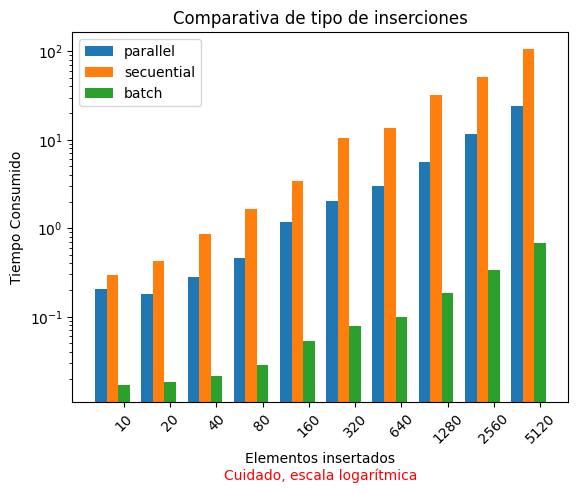

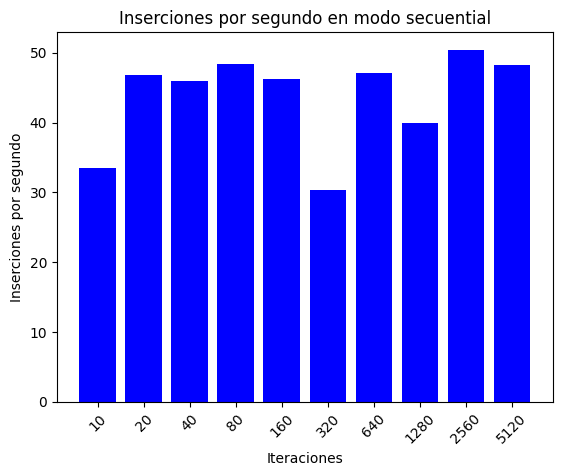

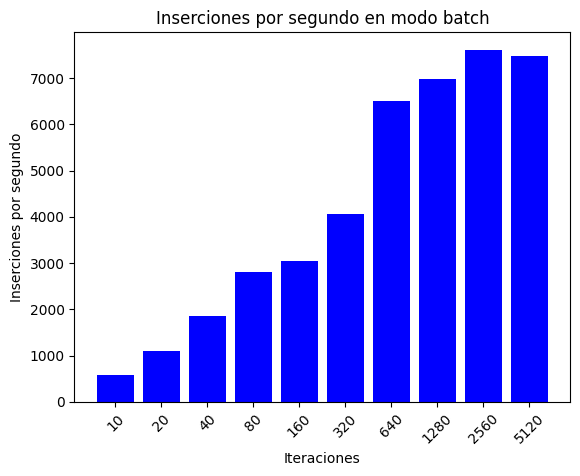

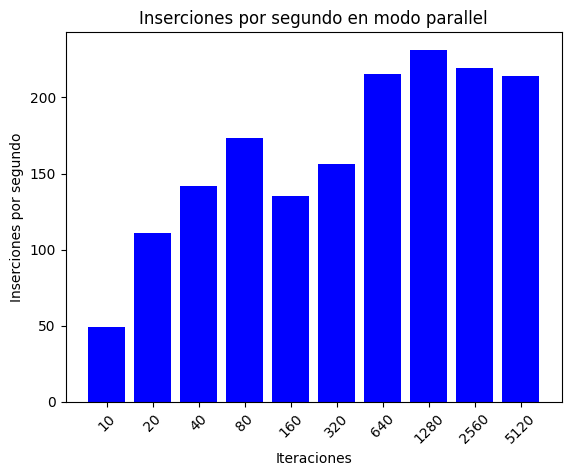

In [279]:
plot_insert_compatarion(all_data[file_to_analize])
plot_insert_rate(all_data[file_to_analize], "secuential")
plot_insert_rate(all_data[file_to_analize], "batch")
plot_insert_rate(all_data[file_to_analize], "parallel")

In [280]:
def plot_read_time(data, db):
    # size = [str(v[f"find.{db}.size"]) for k,v in data.items()]
    iter = [str(k) for k in data.keys()]
    time = [x[f"find.{db}.time"] for x in data.values()]
    plt.bar(iter, time, color="blue")
    plt.xlabel("Iteraciones")
    plt.ylabel("Tiempo de lectura")
    plt.title(f"Tiempo total de lectura en {db}")
    plt.xticks(rotation=45)
    plt.show()


def plot_read_rate(data, db):
    iter = [str(k) for k, v in data.items()]
    size = [str(x[f"find.{db}.size"]) for x in data.values()]
    time = [x[f"find.{db}.rate"] for x in data.values()]
    plt.bar(iter, time, color="blue")
    plt.xlabel("Iteraciones")
    plt.ylabel("Elementos por segundo")
    plt.title(f"Elementos por segundo en {db}")
    plt.xticks(rotation=45)
    plt.show()


def plot_find_comparation_time(data):
    insert_size = [f"{k} - {v['find.compras.size']}" for k,v in data.items()]

    ancho_barra = 0.25
    indice = range(len(insert_size))

    for i, db in enumerate(["compras", "ventas"]):
        desplazamiento = (i - 1) * ancho_barra
        plt.bar(
            [x + desplazamiento for x in indice],
            [x[f"find.{db}.time"] for x in data.values()],
            width=ancho_barra,
            label=db,
        )

    plt.xlabel("Iteraciones")
    plt.ylabel("Tiempo Consumido")
    plt.title("Comparativa de tiempo en lectura de tablas")
    plt.xticks([i + ancho_barra for i in indice], insert_size)
    show_plot()


def plot_find_comparation_rate(data):
    insert_size =  [k for k,v in data.items()]

    ancho_barra = 0.25
    indice = range(len(insert_size))

    for i, db in enumerate(["compras", "ventas"]):
        desplazamiento = (i - 1) * ancho_barra
        plt.bar(
            [x + desplazamiento for x in indice],
            [x[f"find.{db}.rate"] for x in data.values()],
            width=ancho_barra,
            label=db,
        )

    plt.xlabel("Iteraciones")
    plt.ylabel("Elementos leidos por segundo")
    plt.title("Comparativa lecturas por segundo en las tablas")
    plt.xticks([i + ancho_barra for i in indice], insert_size)
    show_plot()

# Análisis lectura

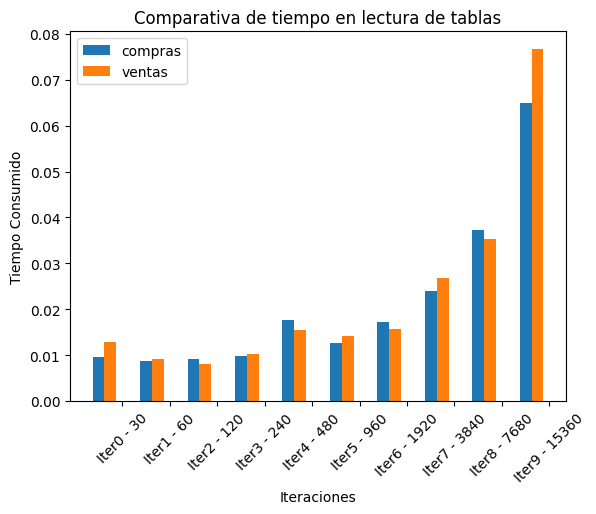

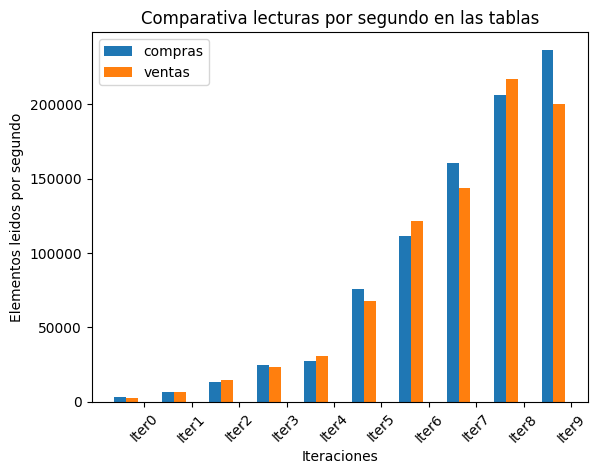

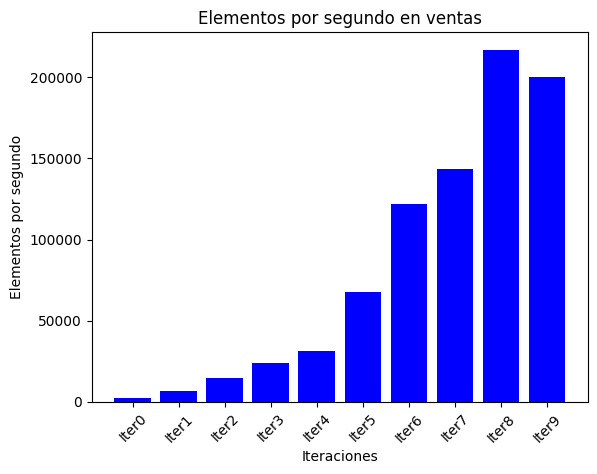

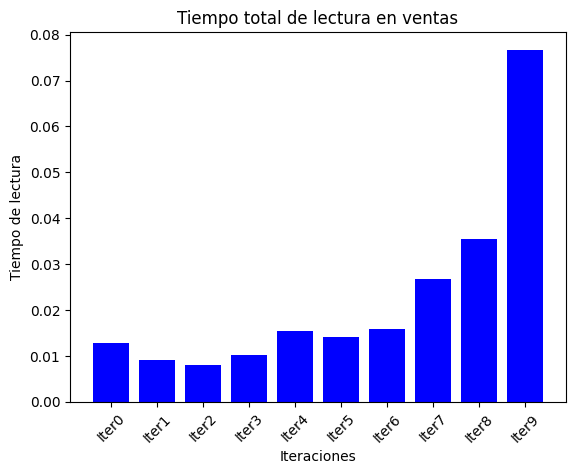

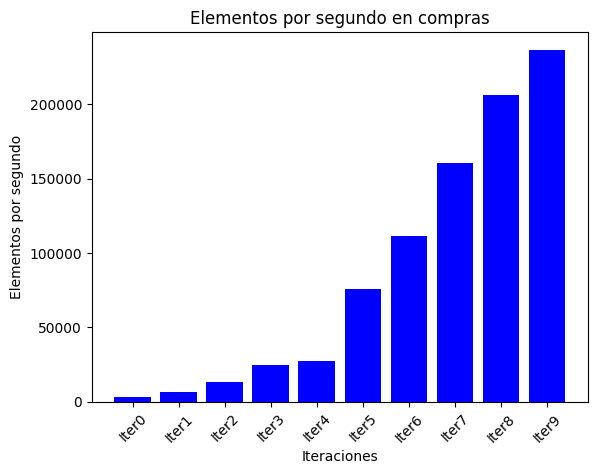

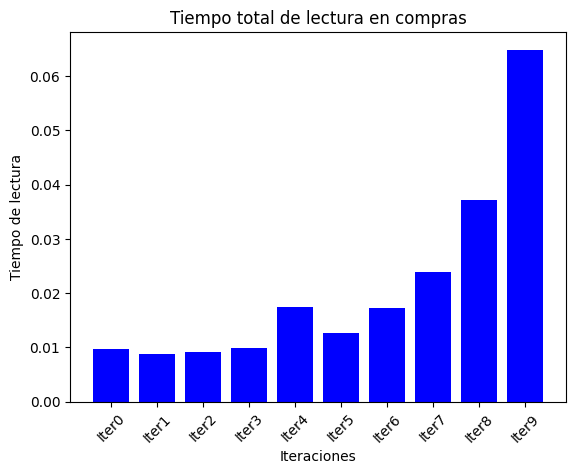

In [281]:
plot_find_comparation_time(all_data[file_to_analize])
plot_find_comparation_rate(all_data[file_to_analize])
plot_read_rate(all_data[file_to_analize], "ventas")
plot_read_time(all_data[file_to_analize], "ventas")

plot_read_rate(all_data[file_to_analize], "compras")
plot_read_time(all_data[file_to_analize], "compras")

# Análisis del borrado

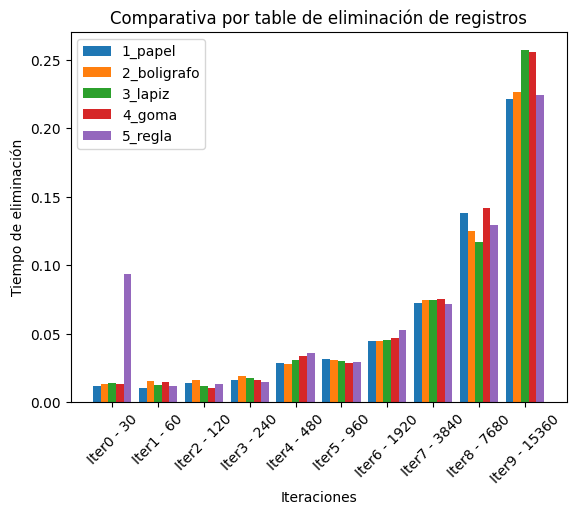

In [282]:
def plot_delete_comparation_time(data, db):
    x_labels = [f"{k} - {v['drop.compras.1_papel.size']}" for k, v in data.items()]
    # x_labels = data.keys()

    bar_keys = ELEMENT_TYPE
    ancho_barra = 1 / (len(bar_keys) + 1)

    indice = range(len(x_labels))

    for i, elem in enumerate(bar_keys):
        desplazamiento = (i - 1) * ancho_barra
        plt.bar(
            [x + desplazamiento for x in indice],
            [x[f"drop.{db}.{elem}.time"] for x in data.values()],
            width=ancho_barra,
            label=elem,
        )

    plt.xlabel("Iteraciones")
    plt.ylabel("Tiempo de eliminación")
    plt.title("Comparativa por table de eliminación de registros")
    plt.xticks([i + ancho_barra for i in indice], x_labels)
    show_plot()


plot_delete_comparation_time(all_data[file_to_analize], "ventas")

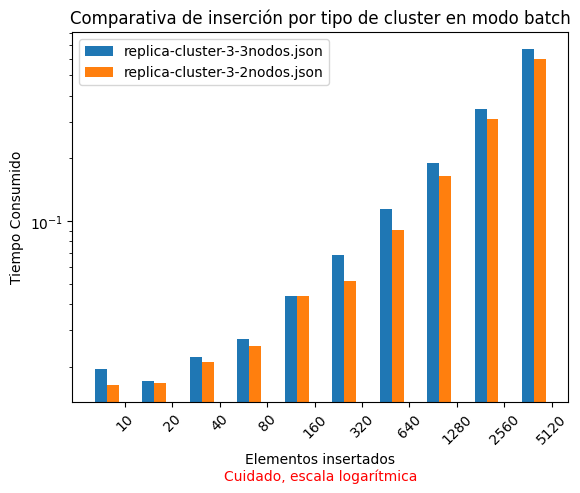

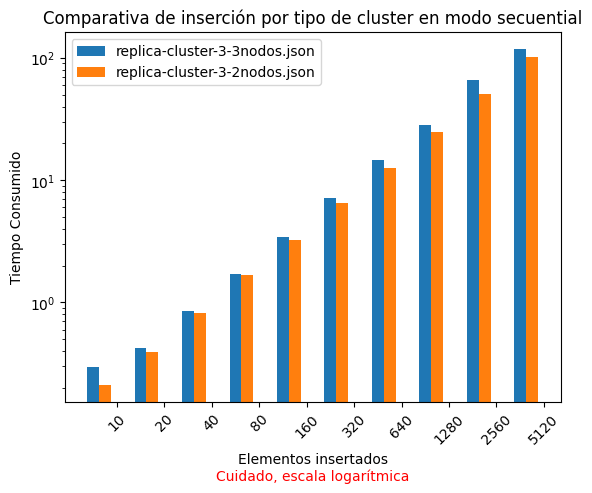

In [283]:
def compare_files(databases, insert_type):
    insert_size = size = [
        str(x[f"insert.parallel.size"]) for x in all_data[databases[0]].values()
    ]  # ¿all inserts same size?

    ancho_barra = 0.25
    indice = range(len(insert_size))

    for i, db in enumerate(databases):
        desplazamiento = (i - 1) * ancho_barra
        plt.bar(
            [x + desplazamiento for x in indice],
            [x[f"insert.{insert_type}.time"] for x in all_data[db].values()],
            width=ancho_barra,
            label=db,
        )

    plt.xlabel("Elementos insertados")
    plt.ylabel("Tiempo Consumido")
    plt.title(f"Comparativa de inserción por tipo de cluster en modo {insert_type}")
    plt.xticks([i + ancho_barra for i in indice], insert_size)
    plt.yscale("log")
    show_plot()


compare_files(
    [
        "replica-cluster-3-3nodos.json",
        "replica-cluster-3-2nodos.json",
    ],
    "batch",
)
compare_files(
    [
        "replica-cluster-3-3nodos.json",
        "replica-cluster-3-2nodos.json",
    ],
    "secuential",
)